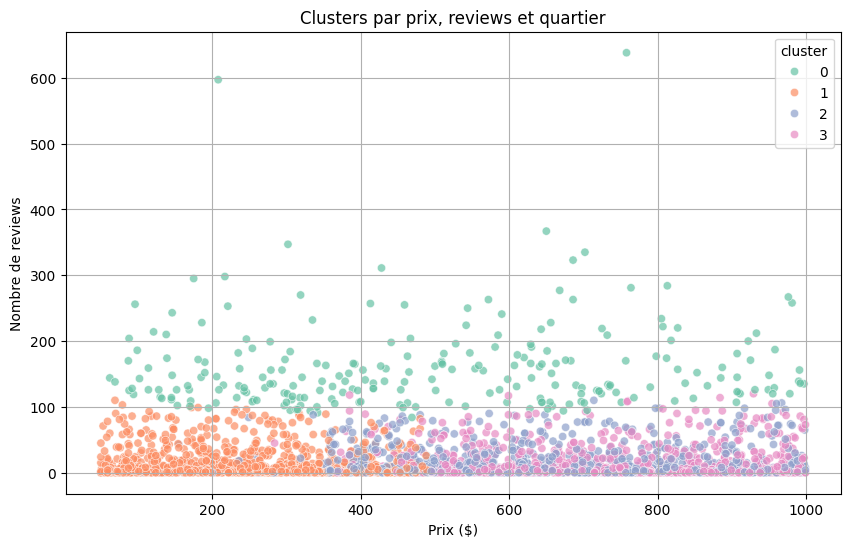

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans

# Chargement
df = pd.read_csv('Airbnb_Open_Data.csv', low_memory=False)

# Colonnes à utiliser
cols_to_use = ['price', 'number of reviews', 'neighbourhood group']
df_clean = df[cols_to_use].dropna()

# Nettoyage du prix
df_clean['price'] = df_clean['price'].replace(r'[\$, ]', '', regex=True)
df_clean = df_clean[df_clean['price'].str.replace('.', '', 1).str.isdigit()]
df_clean['price'] = df_clean['price'].astype(float)

# On filtre les prix trop extrêmes
df_clean = df_clean[df_clean['price'] < 1000]

# Encodage du quartier
le = LabelEncoder()
df_clean['neighbourhood_group_encoded'] = le.fit_transform(df_clean['neighbourhood group'].astype(str))

# 🔧 Réglage : taille de l'échantillon
sample_size = 3000
if len(df_clean) < sample_size:
    raise ValueError(f"Seulement {len(df_clean)} lignes disponibles après nettoyage. Réduis sample_size.")

df_sample = df_clean.sample(sample_size, random_state=42)[['price', 'number of reviews', 'neighbourhood_group_encoded']]

# Standardisation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_sample)

# Clustering
kmeans = KMeans(n_clusters=4, random_state=0)
df_sample['cluster'] = kmeans.fit_predict(X_scaled)

# Visualisation
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_sample,
    x='price',
    y='number of reviews',
    hue='cluster',
    palette='Set2',
    alpha=0.7
)
plt.title("Clusters par prix, reviews et quartier")
plt.xlabel("Prix ($)")
plt.ylabel("Nombre de reviews")
plt.grid(True)
plt.show()
